# Topic Modelling for Biopharmaceutical News Reports

## Product Need and Purpose of Research

With stock markets, many investors and traders base their decisions on key events that occur for a company. Companies normally have to report these key events where are then reported publicly through news sources.

When skimming through stocks in a portfolio, the amount of information can be overwelming. Thus it is important to reduce and filter information down as much as possible. One way to do this is through topic modelling of the news report. The end goal is to have an accurate system that will seperate the articles in such a way as to provide clear demarcation of news article topics.

## KPI and Scope

After looking through some of the research on LDA topic modelling, it turns out that the *best* way to check the optimal solution is to manually look through the data. There are a few tools such as visLDApy which uses PCA to reduce the dimension space to be able to visualize the seperation. We can also take a look at what words are in each of the topics and use best judgement to determine if the model is good. And lastly, can try out some clustering metrics. The issue with these is that they are not made for probabilistic clustering and so the scoring will not necessarily make the most sense.

In [1]:
# Visual Libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from IPython.display import Image
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

# Local Package Libraries
import sys
sys.path.append("../..")

from src.data.make_dataset import load_data
from src.features.topic_modelling.lda_topic_model_sklearn import *
from src.features.topic_modelling.topic_model_helper_functions import *
from src.features.visualizations.topic_visualization_functions import *

# Settings
import warnings
# Stop the warnings for chain in pandas...
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_colwidth', 1000)

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
articles, watchlist = load_data()

In [5]:
with open("../../src/models/lda_model_sklearn", "rb") as infile:
    LDA_holder = pickle.load(infile)

In [6]:
clean_articles = LDA_holder._clean_text(articles, watchlist)

In [73]:
%%html
<style>
div.input {
    display:none;
}
</style>

# Topic Analysis

## 5 Topics

In [13]:
num_topics =5

lda_tfidf = LDA_holder.models.model_df.loc[num_topics].model

tfidf_vectorizer = LDA_holder.tfidf_model
dtm_tfidf = tfidf_vectorizer.transform(LDA_holder._clean_text(articles, watchlist))

pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.216979  0.032090       1        1  23.534450
1     -0.269381  0.275605       2        1  19.916234
2     -0.304435 -0.253557       3        1  19.561255
0      0.220460 -0.030075       4        1  19.026378
4      0.136375 -0.024062       5        1  17.961683, topic_info=    Category        Freq                Term       Total  loglift  logprob
42   Default  276.000000                drug  276.000000  30.0000  30.0000
112  Default  434.000000              review  434.000000  29.0000  29.0000
110  Default  659.000000  researchandmarkets  659.000000  28.0000  28.0000
103  Default  236.000000             quarter  236.000000  27.0000  27.0000
111  Default  263.000000              result  263.000000  26.0000  26.0000
30   Default  221.000000          conference  221.000000  25.0000  25.0000
93   Default  540.000000            pipeline  540.000000  24.0000  24.0000
61   Default  211.000000          healthcare  211.000000  23.0000  23.0000
109  Default  509.000000            research  509.000000  22.0000  22.0000
53   Default  328.000000            forecast  328.000000  21.0000  21.0000
8    Default  475.000000            announce  475.000000  20.0000  20.0000
57   Default  566.000000              global  566.000000  19.0000  19.0000
29   Default  236.000000             company  236.000000  18.0000  18.0000
99   Default  173.000000             profile  173.000000  17.0000  17.0000
18   Default  168.000000               board  168.000000  16.0000  16.0000
27   Default  162.000000            clinical  162.000000  15.0000  15.0000
39   Default  157.000000            director  157.000000  14.0000  14.0000
96   Default  198.000000             present  198.000000  13.0000  13.0000
49   Default  189.000000           financial  189.000000  12.0000  12.0000
66   Default  220.000000             insight  220.000000  11.0000  11.0000
9    Default  142.000000              annual  142.000000  10.0000  10.0000
12   Default  132.000000             appoint  132.000000   9.0000   9.0000
68   Default  197.000000            investor  197.000000   8.0000   8.0000
135  Default  123.000000               trial  123.000000   7.0000   7.0000
134  Default  148.000000               trend  148.000000   6.0000   6.0000
7    Default  304.000000            analysis  304.000000   5.0000   5.0000
133  Default  116.000000           treatment  116.000000   4.0000   4.0000
89   Default  113.000000             patient  113.000000   3.0000   3.0000
33   Default  107.000000                data  107.000000   2.0000   2.0000
51   Default  156.000000               first  156.000000   1.0000   1.0000
..       ...         ...                 ...         ...      ...      ...
33    Topic5  106.530241                data  107.324996   1.7095  -3.3725
92    Topic5  102.906963               phase  103.700175   1.7093  -3.4071
124   Topic5   84.112193               study   84.905871   1.7075  -3.6088
77    Topic5   72.449275                meet   73.244455   1.7060  -3.7581
87    Topic5   59.559807                pain   60.357394   1.7036  -3.9540
2     Topic5   56.083248             advance   56.879133   1.7028  -4.0141
56    Topic5   49.488368                gene   50.293511   1.7008  -4.1392
6     Topic5   47.001955            american   47.797807   1.7001  -4.1908
80    Topic5   45.910223               north   46.707217   1.6997  -4.2143
120   Topic5   40.798312               stage   41.590559   1.6977  -4.3323
1     Topic5   40.645235      administration   41.438714   1.6976  -4.3361
27    Topic5  157.913191            clinical  162.112936   1.6907  -2.9789
131   Topic5   92.628978             therapy   99.816492   1.6422  -3.5123
28    Topic5   46.800868       collaboration   53.071445   1.5912  -4.1950
5     Topic5   40.576088             america   50.220510   1.5037  -4.3378
22    Topic5  125.214838              cancer  159.1916

At first glance, the 5 topic model has a spatial cluster of topics 1, 4, and 5. This is not necessarily an issue and will likely come up only when some articles cannot be easily distinguished between the 3.

Topic 2 and topic 3 are seperated quite far.

**Possible Topic Labels**
1. Forecasting and Analysis Reports
2. Financial Reports
3. Change in Board of Directors and Other Back Office Events
4. Pipeline and Drug Reviews
5. Clinical Trial Events

In [14]:
highlight_repeat_words(LDA_holder, num_topics, 15)

,0,1,2,3,4
0,drug,result,announce,researchandmarkets,review
1,research,quarter,board,global,pipeline
2,company,conference,director,forecast,research
3,pipeline,healthcare,investor,insight,clinical
4,global,present,appoint,analysis,cancer
5,review,financial,class,trend,trial
6,therapeutic,report,officer,report,treatment
7,profile,annual,action,product,researchandmarkets
8,researchandmarkets,pharmaceutical,chief,growth,patient
9,report,first,alert,application,data


From the chart, Topic 1 appears to be made up largely of words that are also important in other columns. This could be seen as a bad sign. On the other hand, columns 2-5 have fairly dispersed repeats.

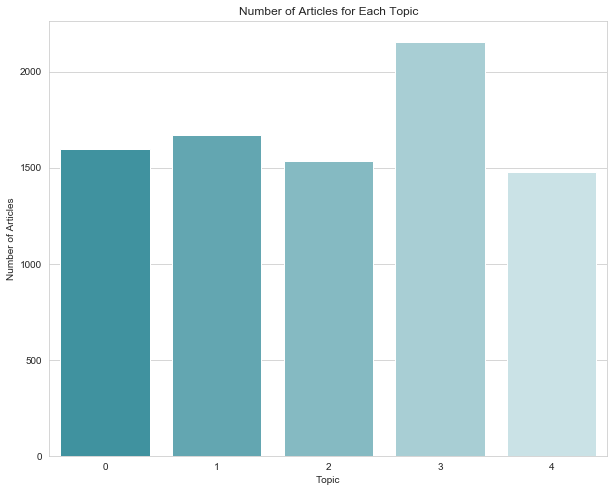

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

_ = topic_result_histogram(articles, watchlist, LDA_holder, num_topics, ax)

Excluding Topic 4, the topics have an even distribution of samples. This is a good result in the sense that the data is evenly demarcated, however it also seems unrealistic that each topic would have an equal number of samples.

## 6 Topics

In [16]:
num_topics = 6

lda_tfidf = LDA_holder.models.model_df.loc[num_topics].model

tfidf_vectorizer = LDA_holder.tfidf_model
dtm_tfidf = tfidf_vectorizer.transform(LDA_holder._clean_text(articles, watchlist))

pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.257198 -0.162075       1        1  23.429967
2      0.249999 -0.003845       2        1  18.557468
5     -0.292398  0.044696       3        1  15.683978
0      0.062690  0.355509       4        1  15.085002
4     -0.131609 -0.052476       5        1  14.428896
3     -0.145880 -0.181810       6        1  12.814689, topic_info=    Category        Freq                Term       Total  loglift  logprob
112  Default  402.000000              review  402.000000  30.0000  30.0000
93   Default  519.000000            pipeline  519.000000  29.0000  29.0000
111  Default  283.000000              result  283.000000  28.0000  28.0000
103  Default  255.000000             quarter  255.000000  27.0000  27.0000
66   Default  244.000000             insight  244.000000  26.0000  26.0000
109  Default  474.000000            research  474.000000  25.0000  25.0000
61   Default  223.000000          healthcare  223.000000  24.0000  24.0000
53   Default  309.000000            forecast  309.000000  23.0000  23.0000
110  Default  632.000000  researchandmarkets  632.000000  22.0000  22.0000
30   Default  234.000000          conference  234.000000  21.0000  21.0000
57   Default  536.000000              global  536.000000  20.0000  20.0000
96   Default  209.000000             present  209.000000  19.0000  19.0000
18   Default  184.000000               board  184.000000  18.0000  18.0000
108  Default  410.000000              report  410.000000  17.0000  17.0000
51   Default  167.000000               first  167.000000  16.0000  16.0000
8    Default  493.000000            announce  493.000000  15.0000  15.0000
49   Default  203.000000           financial  203.000000  14.0000  14.0000
27   Default  174.000000            clinical  174.000000  13.0000  13.0000
9    Default  150.000000              annual  150.000000  12.0000  12.0000
39   Default  170.000000            director  170.000000  11.0000  11.0000
68   Default  201.000000            investor  201.000000  10.0000  10.0000
135  Default  135.000000               trial  135.000000   9.0000   9.0000
7    Default  284.000000            analysis  284.000000   8.0000   8.0000
99   Default  159.000000             profile  159.000000   7.0000   7.0000
42   Default  251.000000                drug  251.000000   6.0000   6.0000
89   Default  124.000000             patient  124.000000   5.0000   5.0000
92   Default  113.000000               phase  113.000000   4.0000   4.0000
134  Default  141.000000               trend  141.000000   3.0000   3.0000
29   Default  223.000000             company  223.000000   2.0000   2.0000
26   Default  106.000000               class  106.000000   1.0000   1.0000
..       ...         ...                 ...         ...      ...      ...
124   Topic6   92.332820               study   93.309145   2.0441  -3.1779
141   Topic6   75.571203               world   76.396369   2.0437  -3.3782
113   Topic6   75.575861             science   76.401694   2.0437  -3.3782
72    Topic6   62.291245                life   63.115886   2.0414  -3.5715
123   Topic6   50.046998            strategy   50.873852   2.0382  -3.7903
135   Topic6  132.448611               trial  135.841455   2.0293  -2.8171
18    Topic6  167.039411               board  184.606873   1.9546  -2.5851
27    Topic6  156.139755            clinical  174.366126   1.9442  -2.6525
39    Topic6  138.053848            director  170.525908   1.8433  -2.7757
33    Topic6   87.753011                data  115.195710   1.7825  -3.2288
100   Topic6   48.289760             program   64.467083   1.7656  -3.8261
84    Topic6   57.033202            oncology   77.876153   1.7431  -3.6597
133   Topic6   81.875697           treatment  118.513302   1.6848  -3.2981
79    Topic6   38.199288                name   60.594733   1.5932  -4.0605
2     Topic6   36.945495             advance   60.144236   1.5673  -4.0939


All of the clusters are graphically seperated well.

**Possible Topic Labels**
1. Miscellaneous
2. Pipeline and Drug Review
3. Shareholder and Back Office Events
4. Financial Reports
5. Conferences and Presentations
6. Clinical Trial Events

In [17]:
highlight_repeat_words(LDA_holder, num_topics, 15)

,0,1,2,3,4,5
0,result,researchandmarkets,pipeline,board,healthcare,announce
1,quarter,global,review,clinical,conference,investor
2,insight,forecast,research,director,present,class
3,report,analysis,drug,trial,annual,officer
4,financial,trend,company,patient,announce,action
5,first,outlook,therapeutic,phase,pharmaceutical,chief
6,pipeline,research,profile,cancer,health,alert
7,year,technology,researchandmarkets,announce,offer,firm
8,third,product,global,study,agreement,shareholder
9,researchandmarkets,device,development,data,care,partner


There are a few repeats in each column that seem evenly dispersed.

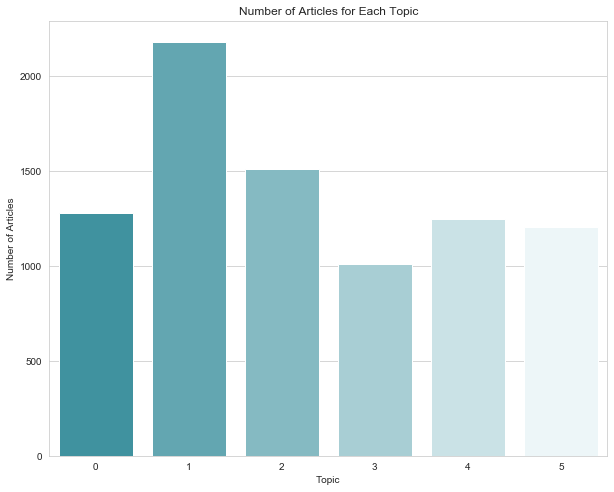

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

_ = topic_result_histogram(articles, watchlist, LDA_holder, num_topics, ax)

The value counts for the topics seems much more reasonable here. There is a decent amount of variance between different topics, but also not an absurd amount.

## 7 Topics

In [19]:
num_topics = 7

lda_tfidf = LDA_holder.models.model_df.loc[num_topics].model

tfidf_vectorizer = LDA_holder.tfidf_model
dtm_tfidf = tfidf_vectorizer.transform(LDA_holder._clean_text(articles, watchlist))

pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.269004  0.003054       1        1  22.196319
4      0.216334  0.035763       2        1  16.707633
1      0.272990  0.006560       3        1  13.834457
5     -0.164631 -0.317677       4        1  12.598886
0     -0.175704 -0.025529       5        1  12.343981
3     -0.228678  0.273120       6        1  11.382842
2     -0.189316  0.024708       7        1  10.935882, topic_info=    Category        Freq                Term       Total  loglift  logprob
112  Default  392.000000              review  392.000000  30.0000  30.0000
93   Default  504.000000            pipeline  504.000000  29.0000  29.0000
111  Default  286.000000              result  286.000000  28.0000  28.0000
103  Default  258.000000             quarter  258.000000  27.0000  27.0000
66   Default  232.000000             insight  232.000000  26.0000  26.0000
109  Default  460.000000            research  460.000000  25.0000  25.0000
110  Default  623.000000  researchandmarkets  623.000000  24.0000  24.0000
61   Default  211.000000          healthcare  211.000000  23.0000  23.0000
96   Default  194.000000             present  194.000000  22.0000  22.0000
68   Default  221.000000            investor  221.000000  21.0000  21.0000
53   Default  304.000000            forecast  304.000000  20.0000  20.0000
30   Default  222.000000          conference  222.000000  19.0000  19.0000
49   Default  210.000000           financial  210.000000  18.0000  18.0000
12   Default  154.000000             appoint  154.000000  17.0000  17.0000
51   Default  168.000000               first  168.000000  16.0000  16.0000
9    Default  140.000000              annual  140.000000  15.0000  15.0000
39   Default  173.000000            director  173.000000  14.0000  14.0000
18   Default  182.000000               board  182.000000  13.0000  13.0000
99   Default  155.000000             profile  155.000000  12.0000  12.0000
83   Default  123.000000             officer  123.000000  11.0000  11.0000
108  Default  404.000000              report  404.000000  10.0000  10.0000
26   Default  123.000000               class  123.000000   9.0000   9.0000
57   Default  527.000000              global  527.000000   8.0000   8.0000
25   Default  116.000000               chief  116.000000   7.0000   7.0000
143  Default  118.000000                year  118.000000   6.0000   6.0000
4    Default  111.000000               alert  111.000000   5.0000   5.0000
0    Default  121.000000              action  121.000000   4.0000   4.0000
42   Default  246.000000                drug  246.000000   3.0000   3.0000
29   Default  216.000000             company  216.000000   2.0000   2.0000
135  Default  119.000000               trial  119.000000   1.0000   1.0000
..       ...         ...                 ...         ...      ...      ...
97    Topic7   76.131152           president   76.987458   2.2019  -3.2123
44    Topic7   74.145538           executive   75.001949   2.2016  -3.2387
74    Topic7   73.583330          management   74.440158   2.2015  -3.2463
87    Topic7   70.437392                pain   71.294456   2.2010  -3.2900
121   Topic7   70.288643               state   71.145372   2.2010  -3.2921
79    Topic7   66.495713                name   67.352132   2.2003  -3.3476
127   Topic7   62.166668                team   63.023013   2.1994  -3.4149
45    Topic7   86.585973              expand   87.886834   2.1982  -3.0836
13    Topic7   80.196165         appointment   82.633251   2.1832  -3.1603
12    Topic7  142.601347             appoint  154.141165   2.1353  -2.5847
39    Topic7  125.417899            director  173.870410   1.8865  -2.7131
16    Topic7   49.854869          bioscience   73.805619   1.8208  -3.6356
18    Topic7  115.733076               board  182.553064   1.7574  -2.7935
75    Topic7   76.151042             medical  139.317984   1.6091  -3.2120
32    Topic7   51.088

The 7 topic model has 2 graphically clustered topics.
Cluster 1 contains toipc 5 and 7, where Cluster 2 contains topics 1-3.

**Potential Topic Labels**
1. Misc
2. Pipeline and Drug Review
3. Clinical Trial
4. Financial Reports
5. Presentation and Conferences
6. Shareholder Events and Lawsuits
7. Board Member Events

In [20]:
highlight_repeat_words(LDA_holder, num_topics, 15)

,0,1,2,3,4,5,6
0,healthcare,insight,appoint,investor,review,result,researchandmarkets
1,present,researchandmarkets,director,class,pipeline,quarter,global
2,conference,pipeline,officer,action,research,financial,forecast
3,announce,trial,chief,alert,company,report,analysis
4,annual,treatment,board,firm,drug,first,technology
5,pharmaceutical,clinical,expand,shareholder,therapeutic,year,trend
6,health,patient,therapeutic,investigation,profile,third,research
7,partner,cancer,appointment,file,researchandmarkets,second,report
8,meet,phase,announce,lawsuit,global,announce,outlook
9,board,disease,medical,deadline,development,fourth,device


Better results w.r.t. repeated terms. Column 5 seems to have quite a few repeats, but the rest look good. Taking a brief look it partly makes sense as topic 2 and topic 5 both have a lot to do with the pipeline.

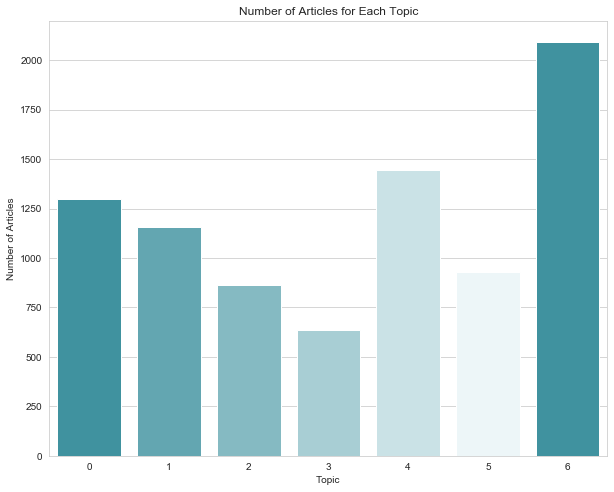

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))

_ = topic_result_histogram(articles, watchlist, LDA_holder, num_topics, ax)

This looks like a realistic distribution of articles. Topic 7, interestingly, has a very large number of instances. Recall that this appears to be the lawsuit topic.

## 8 Topics

In [22]:
num_topics = 8

lda_tfidf = LDA_holder.models.model_df.loc[num_topics].model

tfidf_vectorizer = LDA_holder.tfidf_model
dtm_tfidf = tfidf_vectorizer.transform(LDA_holder._clean_text(articles, watchlist))

pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.190516 -0.108600       1        1  17.046440
7     -0.258259  0.028548       2        1  15.267126
2      0.167818 -0.261163       3        1  13.346911
4     -0.219304  0.048057       4        1  11.868539
5      0.287316  0.240424       5        1  11.393253
6      0.204293  0.089423       6        1  11.027058
3     -0.188677  0.101182       7        1  10.211997
1      0.197330 -0.137870       8        1   9.838677, topic_info=    Category        Freq                Term       Total  loglift  logprob
93   Default  474.000000            pipeline  474.000000  30.0000  30.0000
112  Default  374.000000              review  374.000000  29.0000  29.0000
111  Default  265.000000              result  265.000000  28.0000  28.0000
103  Default  239.000000             quarter  239.000000  27.0000  27.0000
96   Default  203.000000             present  203.000000  26.0000  26.0000
18   Default  178.000000               board  178.000000  25.0000  25.0000
30   Default  228.000000          conference  228.000000  24.0000  24.0000
110  Default  646.000000  researchandmarkets  646.000000  23.0000  23.0000
53   Default  331.000000            forecast  331.000000  22.0000  22.0000
39   Default  166.000000            director  166.000000  21.0000  21.0000
61   Default  219.000000          healthcare  219.000000  20.0000  20.0000
66   Default  207.000000             insight  207.000000  19.0000  19.0000
8    Default  485.000000            announce  485.000000  18.0000  18.0000
68   Default  208.000000            investor  208.000000  17.0000  17.0000
109  Default  464.000000            research  464.000000  16.0000  16.0000
12   Default  140.000000             appoint  140.000000  15.0000  15.0000
9    Default  147.000000              annual  147.000000  14.0000  14.0000
51   Default  156.000000               first  156.000000  13.0000  13.0000
57   Default  560.000000              global  560.000000  12.0000  12.0000
49   Default  193.000000           financial  193.000000  11.0000  11.0000
98   Default  145.000000             product  145.000000  10.0000  10.0000
143  Default  124.000000                year  124.000000   9.0000   9.0000
7    Default  297.000000            analysis  297.000000   8.0000   8.0000
134  Default  147.000000               trend  147.000000   7.0000   7.0000
11   Default  128.000000         application  128.000000   6.0000   6.0000
83   Default  110.000000             officer  110.000000   5.0000   5.0000
108  Default  396.000000              report  396.000000   4.0000   4.0000
26   Default  112.000000               class  112.000000   3.0000   3.0000
0    Default  112.000000              action  112.000000   2.0000   2.0000
25   Default  104.000000               chief  104.000000   1.0000   1.0000
..       ...         ...                 ...         ...      ...      ...
39    Topic8  165.766656            director  166.642006   2.3136  -2.3284
12    Topic8  139.307857             appoint  140.183193   2.3126  -2.5023
83    Topic8  109.339932             officer  110.215272   2.3109  -2.7446
25    Topic8  103.405797               chief  104.281121   2.3104  -2.8004
13    Topic8   73.323087         appointment   74.198408   2.3070  -3.1442
14    Topic8   71.091364               award   71.966818   2.3066  -3.1751
97    Topic8   67.906504           president   68.781851   2.3060  -3.2209
44    Topic8   66.134952           executive   67.010365   2.3057  -3.2473
79    Topic8   59.309669                name   60.185034   2.3042  -3.3563
127   Topic8   55.447121                team   56.322482   2.3032  -3.4236
45    Topic8   67.999382              expand   77.965631   2.1821  -3.2195
100   Topic8   39.517761             program   61.472413   1.8770  -3.7623
17    Topic8   24.881840       biotechnology   61.171636   1.4193  -4.2249
130   Topic8  102.938172         therapeut

In this model, there is only one graphical cluster which contains 2, 4, and 7. The other topics are well dispursed.

**Potential Topic Labels**
1. Pipeline and Drug Review
2. Forecast and Analysis
3. Financial Report
4. Misc.
5. Law Suits
6. Conferences and Presentations
7. Product Information
8. Board Member Events

In [23]:
highlight_repeat_words(LDA_holder, num_topics, 15)

,0,1,2,3,4,5,6,7
0,pipeline,board,result,product,researchandmarkets,investor,present,forecast
1,review,director,quarter,year,global,class,conference,global
2,research,appoint,report,application,treatment,action,announce,researchandmarkets
3,insight,officer,financial,type,medical,alert,healthcare,analysis
4,researchandmarkets,chief,first,science,care,firm,annual,trend
5,drug,therapeutic,third,full,grow,announce,pharmaceutical,growth
6,company,announce,phase,researchandmarkets,outlook,shareholder,data,technology
7,profile,appointment,announce,user,device,agreement,offer,research
8,therapeutic,award,second,global,cagr,investigation,meet,report
9,global,expand,study,system,therapy,file,launch,opportunity


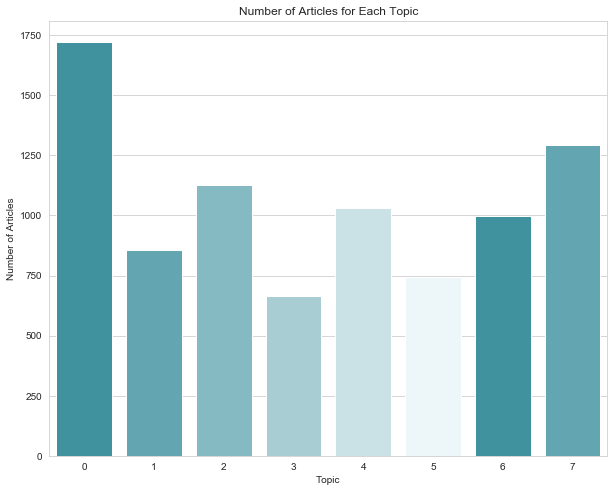

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

_ = topic_result_histogram(articles, watchlist, LDA_holder, num_topics, ax)

## 9 Topics

In [25]:
num_topics = 9

lda_tfidf = LDA_holder.models.model_df.loc[num_topics].model

tfidf_vectorizer = LDA_holder.tfidf_model
dtm_tfidf = tfidf_vectorizer.transform(LDA_holder._clean_text(articles, watchlist))

pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.289820 -0.049059       1        1  21.843028
3      0.264511 -0.136471       2        1  13.581306
7     -0.176852  0.088838       3        1  10.918096
8     -0.231280 -0.236469       4        1  10.572126
4     -0.202641  0.040134       5        1   9.701421
5     -0.075225  0.288154       6        1   9.014414
1     -0.140381 -0.133285       7        1   8.239722
0      0.103242  0.013521       8        1   8.121700
6      0.168806  0.124638       9        1   8.008187, topic_info=    Category        Freq                Term       Total  loglift  logprob
112  Default  389.000000              review  389.000000  30.0000  30.0000
93   Default  480.000000            pipeline  480.000000  29.0000  29.0000
103  Default  246.000000             quarter  246.000000  28.0000  28.0000
111  Default  276.000000              result  276.000000  27.0000  27.0000
61   Default  221.000000          healthcare  221.000000  26.0000  26.0000
18   Default  188.000000               board  188.000000  25.0000  25.0000
30   Default  231.000000          conference  231.000000  24.0000  24.0000
39   Default  175.000000            director  175.000000  23.0000  23.0000
109  Default  462.000000            research  462.000000  22.0000  22.0000
53   Default  285.000000            forecast  285.000000  21.0000  21.0000
110  Default  595.000000  researchandmarkets  595.000000  20.0000  20.0000
22   Default  184.000000              cancer  184.000000  19.0000  19.0000
96   Default  209.000000             present  209.000000  18.0000  18.0000
12   Default  147.000000             appoint  147.000000  17.0000  17.0000
68   Default  208.000000            investor  208.000000  16.0000  16.0000
49   Default  200.000000           financial  200.000000  15.0000  15.0000
27   Default  172.000000            clinical  172.000000  14.0000  14.0000
135  Default  132.000000               trial  132.000000  13.0000  13.0000
99   Default  154.000000             profile  154.000000  12.0000  12.0000
83   Default  116.000000             officer  116.000000  11.0000  11.0000
66   Default  193.000000             insight  193.000000  10.0000  10.0000
57   Default  510.000000              global  510.000000   9.0000   9.0000
25   Default  109.000000               chief  109.000000   8.0000   8.0000
33   Default  114.000000                data  114.000000   7.0000   7.0000
8    Default  503.000000            announce  503.000000   6.0000   6.0000
126  Default  106.000000              system  106.000000   5.0000   5.0000
92   Default  110.000000               phase  110.000000   4.0000   4.0000
9    Default  152.000000              annual  152.000000   3.0000   3.0000
51   Default  164.000000               first  164.000000   2.0000   2.0000
108  Default  388.000000              report  388.000000   1.0000   1.0000
..       ...         ...                 ...         ...      ...      ...
2     Topic9   48.024824             advance   64.393192   2.2314  -3.3615
133   Topic9   91.315010           treatment  131.287733   2.1616  -2.7189
131   Topic9   72.724509             therapy  105.687374   2.1509  -2.9465
84    Topic9   52.793170            oncology   82.795470   2.0747  -3.2668
17    Topic9   38.125708       biotechnology   65.978789   1.9763  -3.5923
23    Topic9   65.868212                care  123.349619   1.8973  -3.0455
142   Topic9   33.048820           worldwide   63.317427   1.8745  -3.7352
56    Topic9   28.703502                gene   56.700365   1.8439  -3.8762
24    Topic9   56.673809                cell  119.798808   1.7762  -3.1959
28    Topic9   21.284146       collaboration   58.388225   1.5156  -4.1752
123   Topic9   13.206647            strategy   42.517516   1.3555  -4.6525
90    Topic9   18.670387              pharma   68.170940   1.2296  -4.3062
40    Topic9   42.963435             disease  161.122843   1.20

This model contains 2 clusters of topics, each of which has only 2 topics. This could be a good sign. Cluster 1 has topics 3 and 5, while cluster 2 has 1 and 2.

**Potential Topic Labels**
1. Misc
2. Pipeline and Drug Review
3. Financial Reports
4. Law Suit
5. Conference and Presentation
6. Clinical Trial
7. Board Member Events
8. Health System and Services
9. Treatment and Therapy (?)

In [26]:
highlight_repeat_words(LDA_holder, num_topics, 15)

,0,1,2,3,4,5,6,7,8
0,health,board,researchandmarkets,review,healthcare,clinical,cancer,quarter,investor
1,system,director,global,pipeline,conference,trial,treatment,result,class
2,service,appoint,forecast,research,present,pharmaceutical,expand,financial,action
3,agreement,officer,analysis,drug,announce,data,therapy,report,alert
4,provide,chief,insight,company,annual,phase,state,first,firm
5,world,appointment,report,profile,offer,patient,care,year,shareholder
6,partner,president,trend,therapeutic,science,study,team,third,investigation
7,technology,executive,research,researchandmarkets,launch,announce,cell,second,file
8,update,reach,pipeline,global,life,meet,management,fourth,lawsuit
9,delivery,announce,growth,development,public,receive,oncology,user,deadline


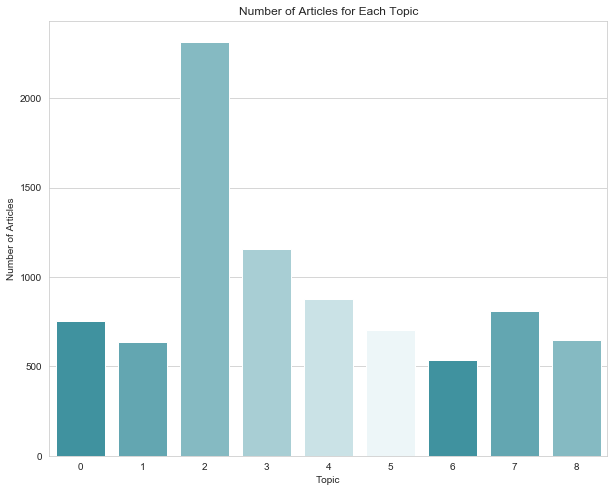

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))

_ = topic_result_histogram(articles, watchlist, LDA_holder, num_topics, ax)

## 10 Topics

In [28]:
num_topics = 10

lda_tfidf = LDA_holder.models.model_df.loc[num_topics].model

tfidf_vectorizer = LDA_holder.tfidf_model
dtm_tfidf = tfidf_vectorizer.transform(LDA_holder._clean_text(articles, watchlist))

pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.135263  0.004806       1        1  13.805769
5      0.260559 -0.011336       2        1  11.106055
6     -0.222947  0.224459       3        1  10.779326
7      0.242575 -0.011374       4        1  10.436594
3     -0.273849 -0.194262       5        1  10.169905
4      0.257574 -0.032984       6        1  10.166773
9     -0.189188  0.152053       7        1   9.910716
2     -0.040027  0.150576       8        1   8.721485
1     -0.183087 -0.249203       9        1   7.682426
8      0.013127 -0.032736      10        1   7.220950, topic_info=    Category        Freq                Term       Total  loglift  logprob
112  Default  372.000000              review  372.000000  30.0000  30.0000
93   Default  491.000000            pipeline  491.000000  29.0000  29.0000
103  Default  235.000000             quarter  235.000000  28.0000  28.0000
66   Default  241.000000             insight  241.000000  27.0000  27.0000
111  Default  261.000000              result  261.000000  26.0000  26.0000
18   Default  183.000000               board  183.000000  25.0000  25.0000
30   Default  231.000000          conference  231.000000  24.0000  24.0000
61   Default  222.000000          healthcare  222.000000  23.0000  23.0000
39   Default  170.000000            director  170.000000  22.0000  22.0000
53   Default  339.000000            forecast  339.000000  21.0000  21.0000
96   Default  205.000000             present  205.000000  20.0000  20.0000
109  Default  465.000000            research  465.000000  19.0000  19.0000
8    Default  480.000000            announce  480.000000  18.0000  18.0000
110  Default  666.000000  researchandmarkets  666.000000  17.0000  17.0000
57   Default  567.000000              global  567.000000  16.0000  16.0000
68   Default  202.000000            investor  202.000000  15.0000  15.0000
49   Default  186.000000           financial  186.000000  14.0000  14.0000
12   Default  137.000000             appoint  137.000000  13.0000  13.0000
7    Default  306.000000            analysis  306.000000  12.0000  12.0000
126  Default  108.000000              system  108.000000  11.0000  11.0000
51   Default  156.000000               first  156.000000  10.0000  10.0000
26   Default  107.000000               class  107.000000   9.0000   9.0000
9    Default  148.000000              annual  148.000000   8.0000   8.0000
143  Default  107.000000                year  107.000000   7.0000   7.0000
33   Default  101.000000                data  101.000000   6.0000   6.0000
135  Default  117.000000               trial  117.000000   5.0000   5.0000
99   Default  149.000000             profile  149.000000   4.0000   4.0000
129  Default  105.000000                test  105.000000   3.0000   3.0000
98   Default  131.000000             product  131.000000   2.0000   2.0000
11   Default  115.000000         application  115.000000   1.0000   1.0000
..       ...         ...                 ...         ...      ...      ...
126  Topic10   96.918080              system  108.470342   2.5156  -2.5558
131  Topic10   73.655897             therapy  108.102625   2.2445  -2.8303
78   Topic10   39.097862            molecule   59.901077   2.2016  -3.4636
74   Topic10   41.150044          management   68.754067   2.1149  -3.4125
136  Topic10   57.860272                type  123.581098   1.8693  -3.0717
84   Topic10   33.240625            oncology   76.963971   1.7886  -3.6259
17   Topic10   25.962020       biotechnology   63.009078   1.7415  -3.8731
2    Topic10   17.672143             advance   57.120489   1.4550  -4.2577
60   Topic10   27.319381              health  132.326278   1.0505  -3.8221
133  Topic10   19.385956           treatment  113.931894   0.8571  -4.1651
89   Topic10   15.550519             patient  110.066682   0.6712  -4.3856
106  Topic10    5.333976              region   45.758512   0.4789  -5.4556
76   Topi

This model has 2 clusters. Cluster 1 contains 3 and 7. Cluster 2 contains 2, 4, and 6.


**Potential Topic Labels**
1. Pipeline and Drug Review
2. Forecast and Analysis
3. Financial Reports
4. Research Analysis
5. Law Suits
6. Product and Device
7. Clinical Trial
8. Conference and Presentations
9. Board Member Events
10. Misc.

In [29]:
highlight_repeat_words(LDA_holder, num_topics, 15)

,0,1,2,3,4,5,6,7,8,9
0,review,board,insight,investor,researchandmarkets,researchandmarkets,quarter,global,system,announce
1,pipeline,director,healthcare,class,global,global,result,forecast,award,clinical
2,research,appoint,conference,action,product,forecast,financial,researchandmarkets,launch,trial
3,therapeutic,announce,present,alert,application,test,report,analysis,therapy,data
4,drug,appointment,pipeline,firm,device,diagnostics,first,technology,receive,phase
5,company,expand,researchandmarkets,shareholder,outlook,cagr,year,research,program,patient
6,profile,president,annual,announce,growth,trend,third,cell,type,study
7,researchandmarkets,health,syndrome,agreement,strategic,analysis,second,report,gene,offer
8,development,name,upcoming,investigation,business,grow,fourth,industry,stage,pharmaceutical
9,officer,collaboration,pharmaceutical,file,user,size,announce,opportunity,administration,meet


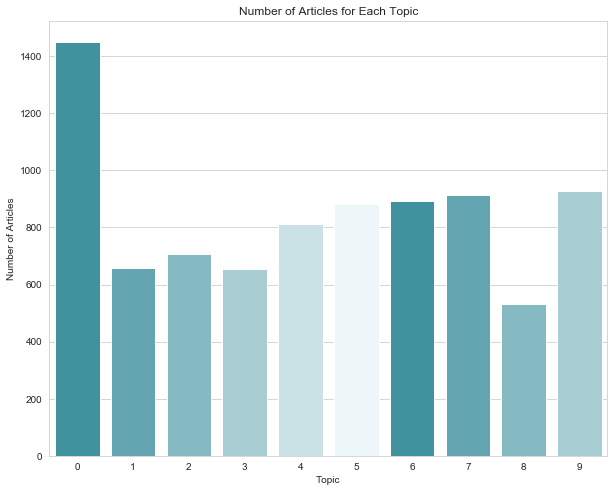

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

_ = topic_result_histogram(articles, watchlist, LDA_holder, num_topics, ax)

This one again looks almost too even (when ignoring topic 1).

## Summary of Results

From the looks of things, I think even though there were two overlapping clusters, the 9 topic split seems to divide the articles into a decent amount and seperate them into specific enough categories. The word's seperate nicely into what I would imagine I would have done for classification.